## 将7个子文件合并

In [3]:
import os
import pandas as pd

# 指定文件夹路径
folder_path = 'data/user_data'

# 获取文件夹内所有的CSV文件
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 初始化一个空的DataFrame来存储所有数据
combined_data = pd.DataFrame()

# 循环读取每一个CSV文件并将其追加到combined_data中
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# 将整合后的数据保存到新的CSV文件中
combined_data.to_csv('data/user_data/all.csv', index=False)

print('所有CSV文件已成功整合并保存为 "all.csv"')


所有CSV文件已成功整合并保存为 "all.csv"


## 实验内容

### 1. 人口统计分析
- 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。
- 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。
- 时区分布：了解用户的时区分布，分析不同地区用户的协作时间模式。

   user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
4   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   

  event_action                 event_time  
0        added  2024-11-26 20:28:37+08:00  
1        added  2024-11-26 20:42:57+08:00  
2        added  2024-11-27 04:10:46+08:00  
3        added  2024-11-27 17:43:50+08:00  
4        added  2024-11-27 19:56:34+08:00  
country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Canada             58600
Netherlands        52367
Czechia            48122
Japan              46553
Switzerland        380

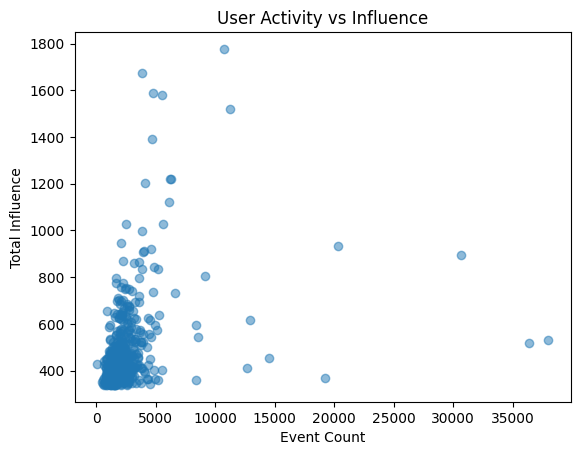

event_type
CommitCommentEvent               3.382054e+05
CreateEvent                      5.383339e+07
DeleteEvent                      5.351956e+07
ForkEvent                        1.138427e+06
GollumEvent                      3.041101e+05
IssueCommentEvent                9.413180e+07
IssuesEvent                      2.707371e+07
MemberEvent                      1.990206e+05
PublicEvent                      2.470887e+04
PullRequestEvent                 1.143337e+08
PullRequestReviewCommentEvent    4.627761e+07
PullRequestReviewEvent           8.506086e+07
PushEvent                        2.210280e+08
ReleaseEvent                     5.222728e+06
WatchEvent                       1.984058e+06
Name: total_influence, dtype: float64


In [13]:
import pandas as pd
data = pd.read_csv('data/user_data/all.csv')
print(data.head())
# 统计每个国家的用户数量
country_distribution = data['country'].value_counts()
# 输出前10个国家的用户数量
print(country_distribution.head(10))
# 提取城市信息
data['city'] = data['location'].str.split(',').str[0].str.strip()
# 统计每个城市的用户数量
city_distribution = data['city'].value_counts()
# 输出前10个城市
print(city_distribution.head(10))
# 统计不同事件类型的数量
event_type_distribution = data['event_type'].value_counts()
# 输出前10个事件类型 
print(event_type_distribution.head(10))
# 统计不同事件行为的数量 
event_action_distribution = data['event_action'].value_counts()  
# 输出前10个事件行为 
print(event_action_distribution.head(10))

# 将event_time转换为日期类型 
data['event_time'] = pd.to_datetime(data['event_time'])  
# 提取日期部分 
data['event_date'] = data['event_time'].dt.date  
# 统计每天的事件数量 
daily_event_counts = data['event_date'].value_counts().sort_index()  
# 输出前10天的事件数量 
print(daily_event_counts.head(10))
# 计算每个用户的事件数量 
user_event_counts = data.groupby('user_id')['event_type'].count()  
# 将用户的事件数量和影响力合并 
user_activity_influence = pd.DataFrame({'event_count': user_event_counts, 'total_influence': data.groupby('user_id')['total_influence'].first()})  
# 绘制活跃度与影响力的关系图 
import matplotlib.pyplot as plt  
plt.scatter(user_activity_influence['event_count'],user_activity_influence['total_influence'], alpha=0.5) 
plt.title('User Activity vs Influence') 
plt.xlabel('Event Count') 
plt.ylabel('Total Influence') 
plt.show()
# 计算每种事件类型的影响力总和 
event_type_influence = data.groupby('event_type')['total_influence'].sum()  
# 输出每种事件类型的影响力 
print(event_type_influence)